<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/ML_Lab%E2%84%964/MatveiClaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
# импортируем csv файл
from google.colab import drive
drive.mount('/content/drive/')
sns.set()
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/StudentPerformanceFactors.csv")
df = df.head(1000)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# О наборе данных

Описание:

Этот набор данных предоставляет обзор различных факторов, влияющих на успеваемость учащихся на экзаменах. Он включает информацию о привычках во время учёбы, посещаемости, участии родителей и других аспектах, влияющих на успеваемость.

1.Hours_Studied(Количество Часов Изучено) - Количество часов, затраченных на обучение в неделю.

2.Attendance(Посещаемость) - Процент посещенных занятий.

3.Parental_Involvement(Родительское участие) - Уровень участия родителей в образовании ребёнка (низкий, средний, высокий).

4.Access_to_Resources(доступ к ресурсам) - Доступность образовательных ресурсов (низкий, средний, Высокий).

5.Extracurricular_Activities(Внеклассная деятельность) - Участие во внеклассных мероприятиях (Да, Нет).

6.Sleep_Hours(Количество часов сна) - Среднее количество часов сна за ночь.

7.Previous_Scores(Предыдущие баллы) - Баллы по предыдущим экзаменам.

8.Motivation_Level(Уровень мотивации) - Уровень мотивации студента (низкий, Средний, Высокий).

9.Internet_Access(Доступ в Интернет) - Наличие доступа в Интернет (Да, Нет).

10.Tutoring_Sessions(Репетиторство) - Количество посещенных репетиторских занятий в месяц.

11.Family_Income(Семейный доход) - уровень дохода семьи (низкий, Средний, Высокий).

12.Teacher_Quality(Качество преподавателя) - Качество работы преподавателей (низкое, среднее, Высокое).

13.School_Type(Тип школы) - Тип посещаемой школы (государственная, Частная).

14.Peer_Influence(Влияние) - Влияние сверстников на успеваемость (положительное, Нейтральное, Отрицательное).

15.Physical_Activity(Физическая активность) - Среднее количество часов физической активности в неделю.

16.Learning_Disabilities(Проблемы с обучением) - Наличие нарушений в обучении (Да, Нет).

17.Parental_Education_Level(Уровень образования робителей) - Самый высокий уровень образования родителей (средняя школа, колледж, аспирантура).

18.Distance_from_Home(Удаленность от дома) - Расстояние от дома до школы (близкое, Умеренное, Далекое).

19.Gender(Пол) - Пол студента (мужчина, Женщина).

20.Exam_Score(Оценка на экзаменах) - Итоговый балл на экзамене.

# Анализ о обработка данных

In [ ]:
# название столбцов
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
# основные статистические показатели
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.126000,79.912000,6.94700,75.204000,1.517000,3.033000,67.271000
std,5.873553,11.184961,1.45819,14.498296,1.194629,1.069137,4.000696
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,58.000000
25%,16.000000,71.000000,6.00000,62.750000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,89.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,43.000000,100.000000,10.00000,100.000000,6.000000,6.000000,100.000000


In [ ]:
# количество строк
df.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
# проверка на пустые значения
df.info()

# нулевых значений нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               1000 non-null   int64 
 1   Attendance                  1000 non-null   int64 
 2   Parental_Involvement        1000 non-null   object
 3   Access_to_Resources         1000 non-null   object
 4   Extracurricular_Activities  1000 non-null   object
 5   Sleep_Hours                 1000 non-null   int64 
 6   Previous_Scores             1000 non-null   int64 
 7   Motivation_Level            1000 non-null   object
 8   Internet_Access             1000 non-null   object
 9   Tutoring_Sessions           1000 non-null   int64 
 10  Family_Income               1000 non-null   object
 11  Teacher_Quality             990 non-null    object
 12  School_Type                 1000 non-null   object
 13  Peer_Influence              1000 non-null   objec

In [ ]:
# Перевод категориальных значений в численные
def rename(name):
  for col in [name]:
    df[name] = df[name].replace(list(df[name].unique()), list(range(len(list(df[name].unique())))))

columns_categorial = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                      'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
                      'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
for i in  range(0,len(columns_categorial)):
  rename(columns_categorial[i])

df


<ipython-input-58-c19551f45e23>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[name] = df[name].replace(list(df[name].unique()), list(range(len(list(df[name].unique())))))


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,0,0,7,73,0,0,0,0,0.0,0,0,3,0,0.0,0.0,0,67
1,19,64,0,1,0,8,59,0,0,2,1,0.0,0,1,4,0,1.0,1.0,1,61
2,24,98,1,1,1,7,91,1,0,2,1,0.0,0,2,4,0,2.0,0.0,0,74
3,29,89,0,1,1,8,98,1,0,1,1,0.0,0,1,4,0,0.0,1.0,0,71
4,19,92,1,1,1,6,65,1,0,3,1,1.0,0,2,4,0,1.0,0.0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18,95,1,0,0,8,54,1,0,2,2,0.0,0,2,3,0,1.0,1.0,1,70
996,31,96,1,1,1,8,93,0,0,3,0,0.0,0,0,3,0,0.0,0.0,0,75
997,24,71,0,0,1,6,91,1,0,3,2,0.0,0,2,2,0,0.0,2.0,1,67
998,17,78,0,1,1,9,76,0,0,4,1,0.0,0,0,2,0,1.0,0.0,0,66


In [ ]:
# нормализация данных

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#dfn = scaler.fit_transform(df)
#df = pd.DataFrame(dfn, columns=df.columns)
#df

In [ ]:
vals = df['Exam_Score'].unique()
vals

array([ 67,  61,  74,  71,  70,  66,  69,  72,  68,  65,  64,  60,  63,
        62, 100,  76,  79,  73,  78,  89,  75,  59,  86,  97,  83,  84,
        80,  58,  94])

In [ ]:
X = df.drop(['Exam_Score'], axis = 1)
y = df['Exam_Score']
yvals = df['Exam_Score']

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

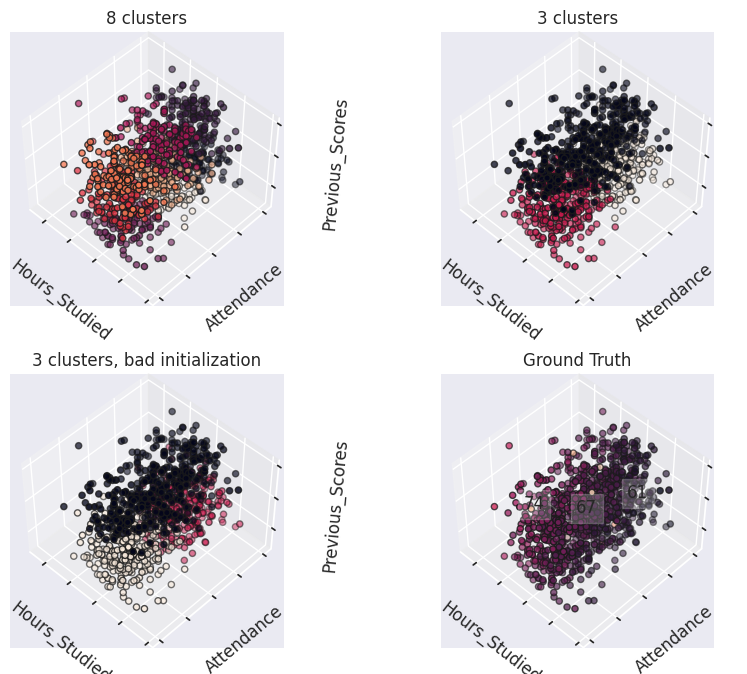

In [ ]:
estimators = [
    ("k_means_Exam_Score_8", KMeans(n_clusters=8)),
    ("k_means_Exam_Score_3", KMeans(n_clusters=3)),
    ("k_means_Exam_Score_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Hours_Studied"], X["Attendance"], X["Previous_Scores"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Hours_Studied")
    ax.set_ylabel("Attendance")
    ax.set_zlabel("Previous_Scores")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
  ds = df[df["Exam_Score"]==name]
  ax.text3D(
    ds["Hours_Studied"].mean(),
    ds["Attendance"].mean(),
    ds["Previous_Scores"].mean(),
    name,
    horizontalalignment="center",
    bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
  )

ax.scatter(X["Hours_Studied"], X["Attendance"], X["Previous_Scores"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Hours_Studied")
ax.set_ylabel("Attendance")
ax.set_zlabel("Previous_Scores")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [ ]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [ ]:
best_metric

[15,
 0.2123808500321199,
 0.0423232805268887,
 array([[1.47096774e+01, 8.00483871e+01, 1.14516129e+00, 1.08064516e+00,
         5.80645161e-01, 7.14516129e+00, 7.61129032e+01, 9.19354839e-01,
         1.12903226e-01, 1.54838710e+00, 6.61290323e-01, 6.93548387e-01,
         2.58064516e-01, 8.06451613e-01, 2.95161290e+00, 8.06451613e-02,
         7.90322581e-01, 6.77419355e-01, 4.19354839e-01],
        [2.45443038e+01, 7.88227848e+01, 9.62025316e-01, 8.22784810e-01,
         5.44303797e-01, 6.72151899e+00, 6.82025316e+01, 7.72151899e-01,
         6.32911392e-02, 1.44303797e+00, 8.22784810e-01, 4.93670886e-01,
         3.16455696e-01, 9.74683544e-01, 3.12658228e+00, 1.51898734e-01,
         7.34177215e-01, 6.32911392e-01, 4.30379747e-01],
        [1.72337662e+01, 6.73506494e+01, 9.09090909e-01, 9.48051948e-01,
         5.58441558e-01, 6.87012987e+00, 9.24155844e+01, 8.31168831e-01,
         6.49350649e-02, 1.51948052e+00, 5.58441558e-01, 4.67532468e-01,
         2.98701299e-01, 8.7012987

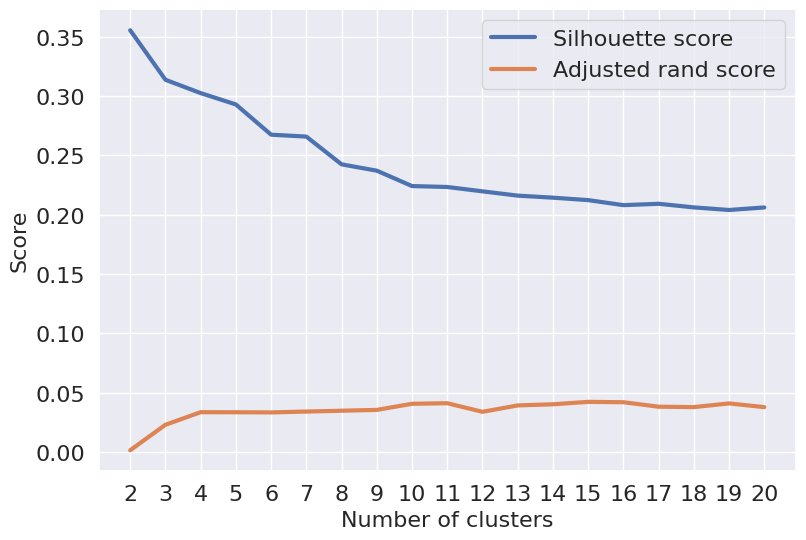

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

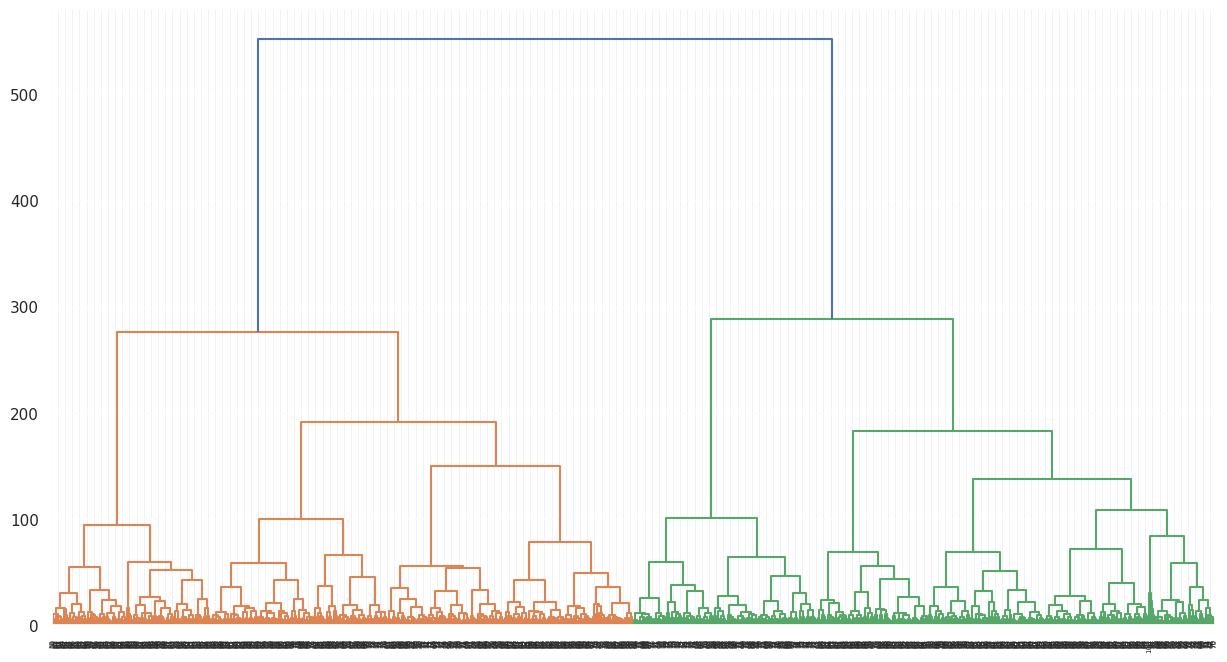

In [ ]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
mins = X.shape[1]

['y', 'b', 'g', 'r']


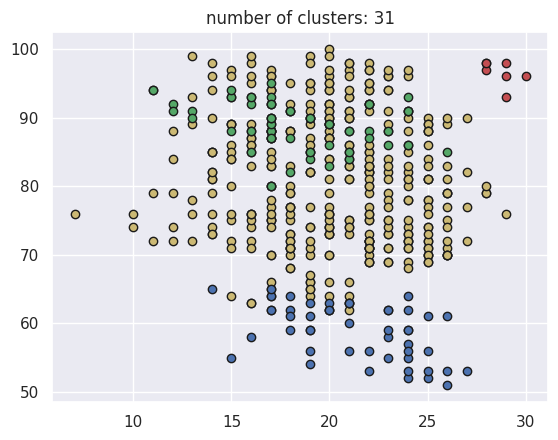

In [ ]:
db = DBSCAN(eps=5, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Hours_Studied"], xy["Previous_Scores"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Hours_Studied"], xy["Previous_Scores"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

Text(0.5, 0.92, 'DBSCAN')

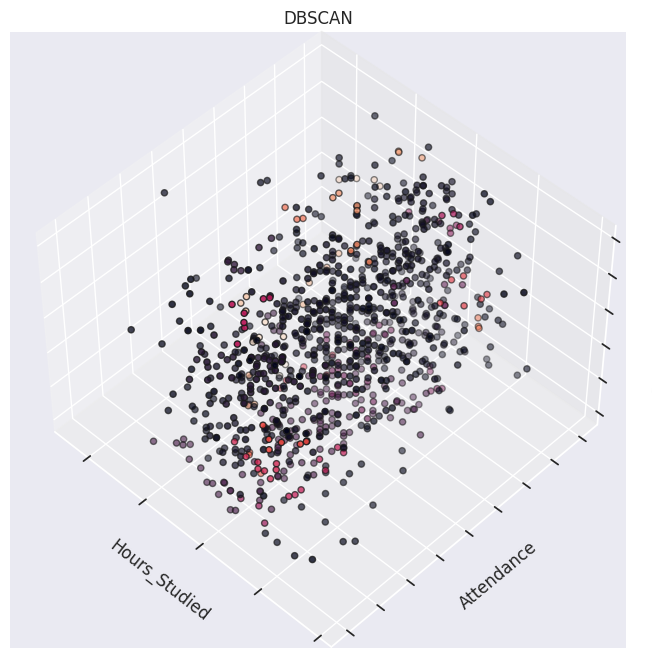

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Hours_Studied"], X["Attendance"], X["Previous_Scores"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Hours_Studied")
ax.set_ylabel("Attendance")
ax.set_zlabel("Previous_Scores")
ax.set_title("DBSCAN")


In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.34
Adjusted Rand Index: 0.01
